In [33]:
import numpy as np
import pandas as pd

tweaked_results = '../data/TweakedResults2017-12-8.xls'
data = pd.read_excel(tweaked_results,
                     usecols = "A, O, P, Q")

data['Litter'] =   [x[:2] for x in data['Image Name']]
data['AnimalID'] = [x[:4] for x in data['Image Name']]

#data.head()

In [31]:
key = pd.read_excel('../data/genotypingkey.xlsx')
#key.head()

In [63]:
df = pd.merge(left = data, right = key,
                        how = 'inner',
                        left_on =  'AnimalID',
                        right_on = 'AnimalID'
                       )
## Drop unneeded columns
df.drop('Litter_y',   axis = 1, inplace = True)
df.drop('ID',         axis = 1, inplace = True)
df.drop('Image Name', axis = 1, inplace = True)

df.rename(columns = {'Litter_x':'Litter'},
                    inplace = True)

df['Branch Per Vessel Length'] = df['Total Number of Junctions']/df['Total Vessels Length']
#df.head()

In [72]:
data_mean = (df
             .set_index(['Litter', 'Genotype']) # pivot
             .sort_index(level = ['Litter', 'Genotype'])
             .mean(level = ['Litter', 'Genotype'])
            )
data_mean

Total Number of Junctions  Junctions density  \
Litter Genotype                                                 
35     +/+                      153.000000         212.725079   
       DEE/DEE                  132.333333         185.499823   
36     +/+                      171.666667         237.625754   
       DEE/DEE                  136.833333         190.815668   
37     +/+                      110.000000         152.771378   
       DEE/+                    161.000000         224.650218   
       DEE/DEE                   98.333333         137.069635   
39     +/+                      163.400000         226.433326   
       DEE/+                    119.666667         166.699910   
       DEE/DEE                  118.400000         165.404923   
40     +/+                      177.000000         245.781790   
       DEE/+                    111.250000         154.939201   
       DEE/DEE                  116.400000         161.893606   
41     +/+                      106.200000         150.792023   
       DEE/DEE                   91.333333         128.593685   

                 Total Vessels Length  Branch Per Vessel Length  
Litter Genotype                                                  
35     +/+                  15.531183                  9.780884  
       DEE/DEE              13.567400                  9.760158  
36     +/+                  16.085692                 10.619454  
       DEE/DEE              14.415517                  9.383569  
37     +/+                  13.102471                  8.354406  
       DEE/+                15.673020                 10.272319  
       DEE/DEE              12.666500                  7.636818  
39     +/+                  15.476645                 10.533119  
       DEE/+                13.478515                  8.865393  
       DEE/DEE              12.999469                  9.032996  
40     +/+                  16.085500                 10.969989  
       DEE/+                12.847697                  8.634773  
       DEE/DEE              13.234076                  8.732405  
41     +/+                  11.683795                  8.951091  
       DEE/DEE              11.323804                  7.953306

In [53]:
wild =   data_mean.xs('+/+',     level = 'Genotype')
mutant = data_mean.xs('DEE/DEE', level = 'Genotype')

In [60]:
from scipy import stats

t_stat, p_val = stats.ttest_rel(wild['Branch Per Vessel Length'],
                               mutant['Branch Per Vessel Length'])

print("p-value for branch per vessel length: {:f}".format(p_val))

p-value for branch per vessel length: 0.014510


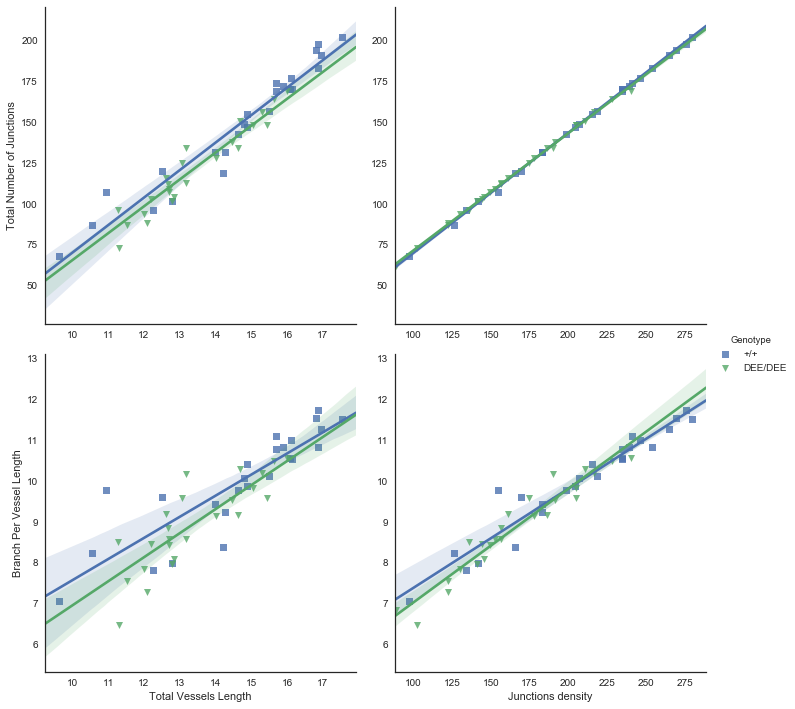

In [71]:
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt

import seaborn as sns


#sns.set(style='ticks', color_codes=True)

sns.pairplot(df,
             hue = 'Genotype',
             hue_order = ['+/+', 'DEE/DEE'],
             #vars=['Total Vessels Length',
             #      'Junctions density',
             #      'Branch Per Vessel Length',
             #     'Total Number of Junctions'],
             x_vars=['Total Vessels Length', 'Junctions density'],
             y_vars=['Total Number of Junctions', 'Branch Per Vessel Length'],
             markers=['s', 'v'],
             kind='reg',
             size=5,
            )

sns.set(style="white", color_codes=True)
#sns.set_context("talk")